In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torchvision
from tqdm import tqdm
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import cv2
import os
from torchvision.transforms import ToTensor
from PIL import Image
import shutil
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as F
import random
from PIL import Image
from torchvision.transforms import RandomHorizontalFlip, RandomVerticalFlip
import os
from torch.utils.data import Dataset


In [2]:
a = np.array(Image.open('/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/train_image/1_HC.png'))
image_height,image_width = a.shape
print(image_height)
print(image_width)

540
800


In [3]:
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, transform_mask=None, train=True):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.transform_mask = transform_mask
        self.images = os.listdir(image_dir)
        self.train = train
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx].replace('.png', '_Annotation.png'))
        
        image = Image.open(image_path)
        mask = Image.open(mask_path).convert("L")

        if self.train:
            if random.random() > 0.5:
                image = F.hflip(image)
                mask = F.hflip(mask)

            if random.random() > 0.5:
                image = F.vflip(image)
                mask = F.vflip(mask)

            if random.random() > 0.5:
                angle = random.choice([-30, -90, -60, -45, -15, 0, 25, 30, 45, 60, 90])
                image = F.rotate(image, angle)
                mask = F.rotate(mask, angle)
        
        if self.transform is not None:
            image = self.transform(image)
        if self.transform_mask is not None:
            mask = self.transform_mask(mask)
        
        return image, mask

In [4]:
image_height,image_width = 572,572

In [5]:
train_transform = transforms.Compose([
    transforms.Resize((image_height,image_width)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])
train_transform_mask = transforms.Compose([
    transforms.Resize((image_height,image_width)),
    transforms.ToTensor()
])


# Create dataset instances
train_image_dir = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/train_image'
train_mask_dir = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/train_mask'
train_dataset= SegmentationDataset(train_image_dir, train_mask_dir, transform=train_transform,transform_mask = train_transform_mask,train = True)


In [6]:
print(len(train_dataset)) #__len__ function
print(train_dataset[0][0].shape)   #__getitem__ function for train_image
print(train_dataset[0][1].shape)   #__getitem__ function for train_mask

799
torch.Size([1, 572, 572])
torch.Size([1, 572, 572])


In [7]:
val_transform = transforms.Compose([
    transforms.Resize((image_height,image_width)),
    transforms.ToTensor(),
     transforms.Normalize((0.5,),(0.5,))
])
val_transform_mask = transforms.Compose([
    transforms.Resize((image_height,image_width)),
    transforms.ToTensor()
])

In [8]:
# Create dataset instances for validation
val_image_dir = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/val_image'
val_mask_dir = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/val_mask'
val_dataset = SegmentationDataset(val_image_dir, val_mask_dir, transform=val_transform,transform_mask = val_transform_mask,train=False)


In [9]:
print(len(val_dataset)) #__len__ function
print(val_dataset[0][0].shape)   #__getitem__ function for val _image
print(val_dataset[0][1].shape)   #__getitem__ function for val_mask

200
torch.Size([1, 572, 572])
torch.Size([1, 572, 572])


In [10]:
'''sample'''
tloader = DataLoader(train_dataset,batch_size=2,shuffle = True,drop_last=True)

In [11]:
for x,y in tloader:
    print(y.shape)

torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572])
torch.Size([2,

In [12]:
'''__getitem__ Method:

Retrieves an image-mask pair by index (idx). This method is called by the DataLoader when iterating over the dataset.
This method is where the images and masks are read from disk, optionally transformed (e.g., resized, converted to tensor), 
and returned as a tuple.The replace method is used to construct the correct mask filename by taking the image filename, stripping off
the .png extension, and appending _Annotation.png.

Transformations:

A set of transformations is defined which will be applied to each image and mask when they are retrieved. In this case, images are 
resized and converted to PyTorch tensors.

DataLoader:

When the DataLoader is created, it takes the train_dataset as an argument and handles the creation of data batches, shuffling, and other 
data preparation steps.
The DataLoader will internally call the __getitem__ method for each index that it needs to create a batch.

Iteration Over DataLoader:

While not shown in the provided code, when you iterate over train_loader, it will request batches from the train_dataset. For each batch, 
it will call the dataset's __getitem__ method for each index in the batch, thereby loading the images and masks as required.'''

"__getitem__ Method:\n\nRetrieves an image-mask pair by index (idx). This method is called by the DataLoader when iterating over the dataset.\nThis method is where the images and masks are read from disk, optionally transformed (e.g., resized, converted to tensor), \nand returned as a tuple.The replace method is used to construct the correct mask filename by taking the image filename, stripping off\nthe .png extension, and appending _Annotation.png.\n\nTransformations:\n\nA set of transformations is defined which will be applied to each image and mask when they are retrieved. In this case, images are \nresized and converted to PyTorch tensors.\n\nDataLoader:\n\nWhen the DataLoader is created, it takes the train_dataset as an argument and handles the creation of data batches, shuffling, and other \ndata preparation steps.\nThe DataLoader will internally call the __getitem__ method for each index that it needs to create a batch.\n\nIteration Over DataLoader:\n\nWhile not shown in the pro

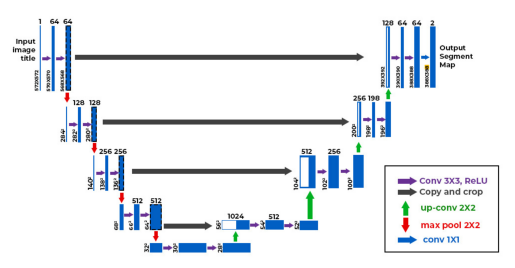

In [13]:
'''how to display image using PIL module along with matpotlib'''
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image_path = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/unet image.jpg'
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


In [14]:
if torch.cuda.is_available():
    print("CUDA is available")# GPU: " + torch.cuda.get_device_name(1))
    device='cuda'
else:
    print("CUDA is not available.")
    device = 'cpu'

CUDA is available


In [15]:
def data_loader(x,batch_size,shuffle,pin_memory):
    
    loader=DataLoader(x,batch_size=batch_size,shuffle=shuffle,drop_last=True,pin_memory=pin_memory,num_workers=4)
    return loader

In [16]:
# Create DataLoader instances
batch_size = 2
shuffle = True
pin_memory = True
train_loader = data_loader(train_dataset, batch_size, shuffle,pin_memory)
for images, masks in train_loader:
    # images and masks are your batches of training data
    print(images.size(),masks.size())

torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
torch.Size([2,

In [17]:
#dataloader for validation
batch_size = 2
shuffle = False
pin_memory = True
val_loader = data_loader(val_dataset, batch_size, shuffle,pin_memory)
for images, masks in val_loader:
    # images and masks are your batches of training data
    print(images.size(),masks.size())
    print(torch.min(masks[0]),torch.max(masks[0]))

torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])
tensor(0.) tensor(1.)
torch.Size([2, 1, 572, 572]) torch.Size(

In [18]:
# def double_conv(in_c,out_c):
#     '''this is the function for a single block in the encoder region as per paper'''
#     conv = nn.Sequential(
#     nn.Conv2d(in_c, out_c, kernel_size=3), 
#     nn.ReLU(inplace=True),
#     nn.Conv2d(out_c, out_c, kernel_size=3), 
#     nn.ReLU(inplace=True)
#     )
    
#     return conv


In [19]:
'''this function will return numpy array from the transformed tensors which were obtained from train loader for groundtruth'''
def img_conv_x(tensor):

    image = tensor.clone().detach().numpy()
    image = image.transpose(1,2,0) #swapping axes ----> (1,28,28) to (28,28,1)
    image = image  * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)) #unnormalize and make it into (28,28,3) for visualising using plt.imshow
    image = image.clip(0,1)
    return image

In [20]:
'''this function will return numpy array from the transformed tensors which were obtained from train loader for mask'''
def img_conv_y(tensor):

    image = tensor.clone().detach().numpy()
    image = image.transpose(1,2,0) #swapping axes ----> (1,28,28) to (28,28,1)
    image = image  * np.array((1,1,1)) #unnormalize and make it into (28,28,3) for visualising using plt.imshow
    image = image.clip(0,1)
    return image

0 torch.Size([2, 1, 572, 572]) torch.Size([2, 1, 572, 572])


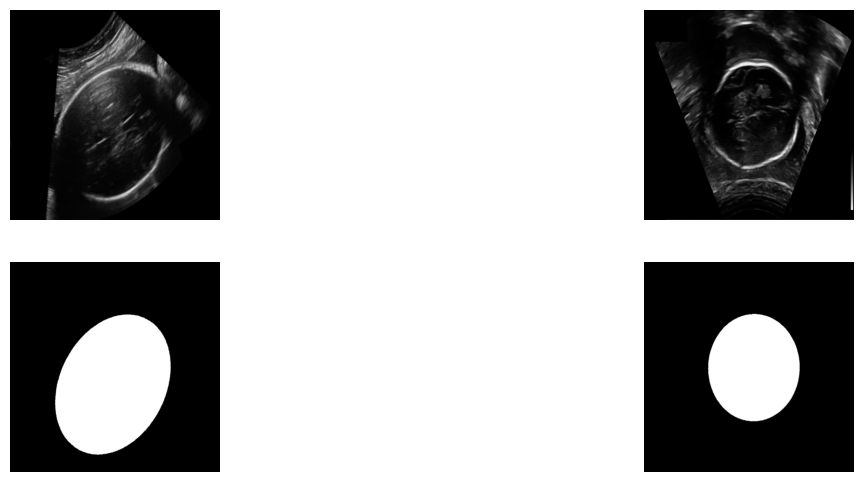

In [21]:
'''looping through the train loader and visualizing the image'''
fig = plt.figure(figsize=(15, 6))

for ith_batch, (images, masks) in enumerate(train_loader):
    print(ith_batch, images.size(), masks.size())

    for index in range(2):  # Adjust this if you want to visualize more or fewer images
        # Plotting the image
        ax = fig.add_subplot(2, 2, index + 1)  # Subplot for the image
        img = img_conv_x(images[index])  # Convert tensor to image format
        plt.imshow(img)
        ax.axis('off')  # Optionally turn off the axis

        # Plotting the annotation
        ax = fig.add_subplot(2, 2, index + 3)  # Subplot for the masks
        ann = img_conv_y(masks[index])  # Convert tensor to image format
        plt.imshow(ann)
        ax.axis('off')  # Optionally turn off the axis

    plt.show()

    if ith_batch == 0:  # Remove this if you want to visualize more batches
        break


In [22]:
def double_conv(in_c,out_c):
    '''this is the function for a sinlgle block in the encoder region'''
    '''There are some modicfications compared to the actuaL UNET paper. here,padding is added, otherwise it becomes complicated as we need 
    to crop the imagaes and all and also batchnorm is added.'''
    conv = nn.Sequential(
    nn.Conv2d(in_c, out_c, kernel_size=3,stride=1,padding=1,bias=False), 
    nn.BatchNorm2d(out_c),
    nn.ReLU(inplace=True),
    nn.Conv2d(out_c, out_c, kernel_size=3,stride=1,padding=1,bias=False),
    nn.BatchNorm2d(out_c),
    nn.ReLU(inplace=True)
    )
    
    return conv

In [23]:
# def crop_img(tensor,target_tensor): #tensor is the parameter from encoder side
#     '''this functions is used to have the skip connections, so for that, we need to crop images from encoder 
#     side and concatenate it to the corresponding decoder block in the diagram and this function can be used to crop the
#     image accordingly.'''
    
#     target_size = target_tensor.size()[2]
#     tensor_size = tensor.size()[2]
#     delta = tensor_size - target_size
#     delta = delta//2
#     return tensor[:,:,delta:tensor_size-delta,delta:tensor_size-delta]


In [24]:
# '''the classs for the unet architecture as per the paper'''
# class unet(nn.Module):
    
#     def __init__(self):
        
#         super(unet,self).__init__()
#         self.max_pool_2x2 = nn.MaxPool2d(kernel_size=2,stride=2)
#         self.down_conv_1 = double_conv(1,64)
#         self.down_conv_2 = double_conv(64,128)
#         self.down_conv_3 = double_conv(128,256)
#         self.down_conv_4 = double_conv(256,512)
#         self.down_conv_5 = double_conv(512,1024)
        
#         self.up_trans_1 = nn.ConvTranspose2d(in_channels=1024,out_channels=512,kernel_size=2,stride=2)
#         self.up_conv_1 = double_conv(1024,512)
#         self.up_trans_2 = nn.ConvTranspose2d(in_channels=512,out_channels=256,kernel_size=2,stride=2)
#         self.up_conv_2 = double_conv(512,256)
#         self.up_trans_3 = nn.ConvTranspose2d(in_channels=256,out_channels=128,kernel_size=2,stride=2)
#         self.up_conv_3 = double_conv(256,128)
#         self.up_trans_4 = nn.ConvTranspose2d(in_channels=128,out_channels=64,kernel_size=2,stride=2)
#         self.up_conv_4 = double_conv(128,64)
        
#         self.out = nn.Conv2d(in_channels=64,out_channels = 1,kernel_size=1) #out_channels = number of classes
#         self.sigmoid = nn.Sigmoid()
        
        
#     '''forward pass of the encoder'''
#     def forward(self,image,device = device): #(batch_size,channels,height,width)
        
#         #encoder
#         x1 = self.down_conv_1(image)
#         x2 = self.max_pool_2x2(x1)
#         x3 = self.down_conv_2(x2)
#         x4 = self.max_pool_2x2(x3)
#         x5 = self.down_conv_3(x4)
#         x6 = self.max_pool_2x2(x5)
#         x7 = self.down_conv_4(x6)
#         x8 = self.max_pool_2x2(x7)
#         x9 = self.down_conv_5(x8)
        
#         #decoder
#         x = self.up_trans_1(x9)
#         y = crop_img(x7,x)
#         x = self.up_conv_1(torch.cat([x,y],1))
        
#         x = self.up_trans_2(x)
#         y = crop_img(x5,x)
#         x = self.up_conv_2(torch.cat([x,y],1))
        
#         x = self.up_trans_3(x)
#         y = crop_img(x3,x)
#         x = self.up_conv_3(torch.cat([x,y],1))
        
#         x = self.up_trans_4(x)
#         y = crop_img(x1,x)
#         x = self.up_conv_4(torch.cat([x,y],1))
        
#         x = self.out(x) #this should give the output segmentation mask where the number of channels will be 1 here
#         #x = self.sigmoid(x) #to make it into the range of 0 and 1 since it is a binary classification
        
#         #print(x.size())
        
#         return x

In [25]:
class UNet(nn.Module):
    def __init__(self, in_c=1, out_c=1, features=[64, 128, 256, 512]):
        super(UNet, self).__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Encoder region
        for feature in features:
            self.downs.append(double_conv(in_c, feature))
            in_c = feature

        # Bottleneck layer
        self.bottleneck = double_conv(features[-1], features[-1] * 2)

        # Decoder region
        for feature in reversed(features):
            self.ups.append(nn.ConvTranspose2d(feature * 2, feature, kernel_size=2, stride=2))
            self.ups.append(double_conv(feature * 2, feature))

        # Final output layer
        self.out = nn.Conv2d(features[0], out_c, kernel_size=1)
        self.output = nn.Sigmoid()

    def forward(self, x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]

        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx // 2]

            # Resize x to match skip_connection if needed
            if x.shape != skip_connection.shape:
                x = transforms.functional.resize(x, size=skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx + 1](concat_skip)
        x = self.out(x)
        x = self.output(x)  #sigmoid layer
        return x


In [26]:
'''this has been written for testing the network if it is working or not'''
if __name__ == '__main__':
    image = torch.rand((1,1,572,572)).to(device)
    print(image.shape)
    model1 = UNet()
    model1=model1.to(device)
    a = model1(image)
    print(a.size())

torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])


In [27]:
# calculates similarity index between predicted and actual segmentation (used during training)
def dice_score(preds, targets):
    smooth = 0.000001
    size_of_batch = preds.size(0)
    #preds = (preds>0.5).float() #while training, no need too do this step as contnuous values are better
    p1 = preds.view(size_of_batch, -1)
    p2 = targets.view(size_of_batch, -1)
    
    intersection = (p1 * p2).sum()
    
    dice =  ((2.0 * intersection )+ smooth) / (p1.sum() + p2.sum() + smooth)
    #dice.requires_grad = True
    
    return dice
    
def dice_loss(preds, targets): ## to add in bce looss
  
  dice_loss = 1 -(dice_score(preds, targets))
  
  return dice_loss

In [28]:
# def dice_loss(preds, targets, smooth=1e-6):
#     preds = preds.contiguous()
#     targets = targets.contiguous()

#     # Threshold predictions
#     #preds = torch.sigmoid(preds)  # if the model outputs logits
#     preds = (preds > 0.5).float()  # Thresholding step

#     intersection = (preds * targets).sum()
#     dice = (2. * intersection + smooth) / (preds.sum() + targets.sum() + smooth)

#     return 1 - dice


In [29]:
def check_accuracy(loader, model, device="cuda"):
    num_correct = 0
    num_pixels = 0
    dice_score = 0

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)  # Make sure y has the same dimension as model output
            #preds = torch.sigmoid(model(x)) if sigmoid is not applied already in the final layer
            preds = model(x)
            preds = (preds > 0.5).float ()

            # Ensure that the dimensions match for accuracy calculation
            if preds.shape == y.shape:
                num_correct += (preds == y).sum()
                num_pixels += torch.numel(preds)
                dice_score += (2 * (preds * y).sum()) / (
                    (preds + y).sum() + 1e-8
                )
            else:
                print("Prediction and ground truth dimension mismatch")

    print(
        f"Got {num_correct}/{num_pixels} with acc {num_correct/num_pixels*100:.2f}%" #pixel-pixel accuracy
    )
    print(f"Dice score: {dice_score/len(loader)}") #dice-score accuracy
    return dice_score


In [30]:
def save_checkpoint(state,filename='my_checkpoint.pth.tar'):
    '''This function can be used to save the trained parameters while training(after each epochs etc.)'''
    print("=> Saving Checkpoint")
    torch.save(state,filename)
    

In [31]:
def load_checkpoint(checkpoint,model):
    print('=>loading checkpoint')
    model.load_state_dict(checkpoint["state_dict"])
    

In [32]:
# '''to save some of the predictions and targets '''
# saved_images_dir = "prediction_saved"
# os.makedirs(saved_images_dir, exist_ok=True)

In [33]:
def save_predictions_as_imgs(loader, model, folder="/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/prediction_saved", device="cuda"):
    model.eval()

    # Create the folder if it does not exist
    if not os.path.exists(folder):
        os.makedirs(folder)

    for idx, (x, y) in enumerate(loader):
        x = x.to(device=device)
        y = y.to(device=device)

        with torch.no_grad():
            #preds = torch.sigmoid(model(x))
            preds = model(x)
            preds = (preds > 0.5).float()

        # Ensure preds and y have a channel dimension
        if preds.dim() == 3:
            preds = preds.unsqueeze(1)
        if y.dim() == 3:
            y = y.unsqueeze(1)
        
        torchvision.utils.save_image(preds, os.path.join(folder, f"{idx}_HC_Prediction.png"))
        torchvision.utils.save_image(y, os.path.join(folder, f"{idx}_HC.png"))

In [74]:
'''This class is used for performing early stopping fo training under no improvement in validation dice score'''

class EarlyStopping:
    
    def __init__(self, patience=3, min_delta=0, path='/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar'):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.epochs_no_improve = 0
        self.early_stop = False
        self.path = path

    def __call__(self, dice_score, model):
        score = dice_score
        if self.best_score is None:
            self.best_score = score
            self.savecheckpoint(dice_score, model)
        elif score > self.best_score + self.min_delta:
            self.best_score = score
            self.epochs_no_improve = 0
            self.savecheckpoint(dice_score, model)
        else:
            self.epochs_no_improve += 1
            if self.epochs_no_improve >= self.patience:
                self.early_stop = True

    def savecheckpoint(self, dice_score, model):
        if dice_score >= self.best_score:
            torch.save(model.state_dict(), self.path)
            print(f"Model improved and saved to {self.path}")


In [75]:
def train(model, train_loader, val_loader, optimizer, loss_fn, epochs,batch_size,early_stopping,scaler,device=device):


    train_loss=[]
    validation_loss=[]
    for epoch in range(epochs):
        
        model.train()  # Set the model to training mode
        running_loss = 0.0
        

        # Training Phase
        with tqdm(train_loader, unit="batch") as tepoch:
            for inputs, labels in tepoch:
                tepoch.set_description(f"Training Epoch {epoch+1}")

                '''Move data to the device and set the datatypes, otherwise, there would be error in crossentropy calculatiohn'''
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                '''Here, the combination of dice loss and cross entropy loss is used and Adam optimizer is used.'''

                # with torch.cuda.amp.autocast():  #Automatic mixed precision(AMP) training and scaler is used along with this but it will
                #not work for bceloss; it can be used when bcewithlogitsloss is used.
                    
                outputs = model(inputs)
                loss1 = loss_fn(outputs, labels) #Binary cross entropy
                loss2 = dice_loss(outputs, labels)  #dice_loss
                loss = loss1  + loss2 #weighted loss function can be used here

                optimizer.zero_grad()  # make the parameter gradients zero
                # scaler.scale(loss).backward()  # Backward pass and scaler addresses potential underflow during backpropagation
                # scaler.step(optimizer)
                # scaler.update() # Optimize
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                tepoch.set_postfix(loss=running_loss / len(train_loader))
            
            print(f"Epoch {epoch + 1} Training Loss per sample: {running_loss/(batch_size*len(train_loader))}") #average loss per sample
            train_loss.append(running_loss/(batch_size*len(train_loader)))


        # save model parameters as checkpoint afer each epoch
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer":optimizer.state_dict(),
        }
        save_checkpoint(checkpoint)

        # Validation Phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            with tqdm(val_loader, unit="batch") as vtepoch:
                for inputs_val, labels_val in vtepoch:
                    vtepoch.set_description(f"Validation Epoch {epoch+1}")

                    inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)

                    y_out_val = model(inputs_val)
                    outputs_val = (y_out_val + 0.5).int().float()
                    loss1_val = loss_fn(y_out_val, labels_val) #binary cross entropy
                    loss2_val = dice_loss(outputs_val, labels_val)  # Assuming dice_loss is defined
                    loss_val = loss1_val + loss2_val #weighted loss function is used here

                    val_loss += loss_val.item()
                    vtepoch.set_postfix(val_loss=val_loss / len(val_loader))
                
                print(f"Epoch {epoch + 1} Validation Loss per sample: {val_loss/(batch_size*len(val_loader))}")
                validation_loss.append(val_loss/(batch_size*len(val_loader)))
                
        # check accuracy after each epoch
        dice_score = check_accuracy(val_loader, model, device=device)
        
        early_stopping(dice_score, model) #to see if the validation datatset is not overfitting and this will go to __call__ in the class

        if early_stopping.early_stop:
            print("Early stopping triggered")
            return train_loss,validation_loss
            #break

        # save predictions to a folder using torch.utils.save()
        save_predictions_as_imgs(val_loader, model, folder ="/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/prediction_saved",
                                  device=device)

    #torch.cuda.empty_cache() 
    '''The function torch.cuda.empty_cache() 
    releases all unused memory cached by the CUDA driver so that it can be used for other GPU applications.'''
    
    print(f"Finished Training. Final Training Loss: {running_loss / len(train_loader)}")
    print(f"Final Validation Loss: {val_loss / len(val_loader)}")
    return train_loss,validation_loss
    
    


In [76]:
def main(learning_rate,batch_size,train_loader,val_loader,num_epochs,early_stopping,load_model = False):
    '''This is the function to be called'''
    
    model = UNet(in_c=1, out_c=1)
    #model = nn.DataParallel(model, device_ids=[0, 1])
    model = model.to(device)
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scaler = torch.cuda.amp.GradScaler()
    
    '''If there are pre-trained weights, we can assign that to model here'''
    if load_model:
        load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)

    train_loss,validation_loss = train(model, train_loader, val_loader, optimizer, loss_fn, num_epochs, batch_size, early_stopping,scaler)
    return model, train_loss, validation_loss

In [78]:
learning_rate = 0.01
device = "cuda" if torch.cuda.is_available() else "cpu"
num_epochs = 15
batch_size=2
early_stopping = EarlyStopping(patience=3, min_delta=0.001, path='/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar')
load_model = False #Initally, the model was trained for 10 epochs and the weights were loaded to train again.

In [79]:
model ,train_loss,validation_loss = main(learning_rate,batch_size,train_loader,val_loader,num_epochs,early_stopping,load_model)

Training Epoch 1: 100%|████████████████████████████████████████████████| 399/399 [01:05<00:00,  6.12batch/s, loss=0.548]


Epoch 1 Training Loss per sample: 0.2739162545529822
=> Saving Checkpoint


Validation Epoch 1: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 18.19batch/s, val_loss=0.362]

Epoch 1 Validation Loss per sample: 0.1807555028051138


Got 60294125/65436800 with acc 92.14%
Dice score: 0.8712411522865295
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 2: 100%|█████████████████████████████████████████████████| 399/399 [01:05<00:00,  6.08batch/s, loss=0.41]


Epoch 2 Training Loss per sample: 0.20478300968731256
=> Saving Checkpoint


Validation Epoch 2: 100%|███████████████████████████████████████████| 100/100 [00:05<00:00, 18.13batch/s, val_loss=0.36]

Epoch 2 Validation Loss per sample: 0.1799681431800127


Got 60381998/65436800 with acc 92.28%
Dice score: 0.8779124021530151
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 3: 100%|████████████████████████████████████████████████| 399/399 [01:05<00:00,  6.05batch/s, loss=0.345]


Epoch 3 Training Loss per sample: 0.17237489097249836
=> Saving Checkpoint


Validation Epoch 3: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 19.24batch/s, val_loss=0.303]

Epoch 3 Validation Loss per sample: 0.15174899522215127


Got 60954372/65436800 with acc 93.15%
Dice score: 0.8894237875938416
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 4: 100%|█████████████████████████████████████████████████| 399/399 [01:04<00:00,  6.23batch/s, loss=0.32]


Epoch 4 Training Loss per sample: 0.1600308666719978
=> Saving Checkpoint


Validation Epoch 4: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 19.24batch/s, val_loss=0.289]

Epoch 4 Validation Loss per sample: 0.14467932227998972


Got 61070277/65436800 with acc 93.33%
Dice score: 0.890419602394104
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 5: 100%|████████████████████████████████████████████████| 399/399 [01:04<00:00,  6.22batch/s, loss=0.294]


Epoch 5 Training Loss per sample: 0.14710256006372602
=> Saving Checkpoint


Validation Epoch 5: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 19.24batch/s, val_loss=0.291]

Epoch 5 Validation Loss per sample: 0.14527879361063242


Got 60940029/65436800 with acc 93.13%
Dice score: 0.8866653442382812


Training Epoch 6: 100%|████████████████████████████████████████████████| 399/399 [01:04<00:00,  6.23batch/s, loss=0.267]


Epoch 6 Training Loss per sample: 0.13327291880484513
=> Saving Checkpoint


Validation Epoch 6: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 19.25batch/s, val_loss=0.244]

Epoch 6 Validation Loss per sample: 0.1220953618735075


Got 61595086/65436800 with acc 94.13%
Dice score: 0.9071979522705078
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 7: 100%|████████████████████████████████████████████████| 399/399 [01:04<00:00,  6.20batch/s, loss=0.246]


Epoch 7 Training Loss per sample: 0.12281183380269467
=> Saving Checkpoint


Validation Epoch 7: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 19.25batch/s, val_loss=0.214]

Epoch 7 Validation Loss per sample: 0.106924081556499


Got 62026775/65436800 with acc 94.79%
Dice score: 0.9160451889038086
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 8: 100%|████████████████████████████████████████████████| 399/399 [01:04<00:00,  6.21batch/s, loss=0.235]


Epoch 8 Training Loss per sample: 0.11745640667234745
=> Saving Checkpoint


Validation Epoch 8: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 19.24batch/s, val_loss=0.187]

Epoch 8 Validation Loss per sample: 0.09337774047628045


Got 62551233/65436800 with acc 95.59%
Dice score: 0.9273459911346436
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 9: 100%|█████████████████████████████████████████████████| 399/399 [01:04<00:00,  6.22batch/s, loss=0.22]


Epoch 9 Training Loss per sample: 0.11005682888485137
=> Saving Checkpoint


Validation Epoch 9: 100%|██████████████████████████████████████████| 100/100 [00:05<00:00, 19.24batch/s, val_loss=0.172]

Epoch 9 Validation Loss per sample: 0.08582586832344533


Got 62756327/65436800 with acc 95.90%
Dice score: 0.9349924921989441
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 10: 100%|███████████████████████████████████████████████| 399/399 [01:04<00:00,  6.22batch/s, loss=0.208]


Epoch 10 Training Loss per sample: 0.10423942906011764
=> Saving Checkpoint


Validation Epoch 10: 100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.16batch/s, val_loss=0.166]

Epoch 10 Validation Loss per sample: 0.08298989288508891


Got 62848413/65436800 with acc 96.04%
Dice score: 0.9378480315208435
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 11: 100%|███████████████████████████████████████████████| 399/399 [01:04<00:00,  6.22batch/s, loss=0.187]


Epoch 11 Training Loss per sample: 0.0937062311861524
=> Saving Checkpoint


Validation Epoch 11: 100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.20batch/s, val_loss=0.235]

Epoch 11 Validation Loss per sample: 0.11738840131089091


Got 61837779/65436800 with acc 94.50%
Dice score: 0.9107761979103088


Training Epoch 12: 100%|███████████████████████████████████████████████| 399/399 [01:04<00:00,  6.23batch/s, loss=0.186]


Epoch 12 Training Loss per sample: 0.09324120859006294
=> Saving Checkpoint


Validation Epoch 12: 100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.22batch/s, val_loss=0.169]

Epoch 12 Validation Loss per sample: 0.08441905081272125


Got 62838919/65436800 with acc 96.03%
Dice score: 0.9358453750610352


Training Epoch 13: 100%|███████████████████████████████████████████████| 399/399 [01:04<00:00,  6.22batch/s, loss=0.183]


Epoch 13 Training Loss per sample: 0.09132806944630499
=> Saving Checkpoint


Validation Epoch 13: 100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.25batch/s, val_loss=0.127]

Epoch 13 Validation Loss per sample: 0.06369468970224261


Got 63361320/65436800 with acc 96.83%
Dice score: 0.9499664306640625
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar


Training Epoch 14: 100%|███████████████████████████████████████████████| 399/399 [01:04<00:00,  6.23batch/s, loss=0.168]


Epoch 14 Training Loss per sample: 0.08392795810200517
=> Saving Checkpoint


Validation Epoch 14: 100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.24batch/s, val_loss=0.148]

Epoch 14 Validation Loss per sample: 0.07401899054646492


Got 62991488/65436800 with acc 96.26%
Dice score: 0.9426852464675903


Training Epoch 15: 100%|███████████████████████████████████████████████| 399/399 [01:04<00:00,  6.21batch/s, loss=0.149]


Epoch 15 Training Loss per sample: 0.07467084421419111
=> Saving Checkpoint


Validation Epoch 15: 100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.20batch/s, val_loss=0.125]

Epoch 15 Validation Loss per sample: 0.06244690865278244


Got 63424720/65436800 with acc 96.93%
Dice score: 0.9518221616744995
Model improved and saved to /media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/early_stopping.pth.tar
Finished Training. Final Training Loss: 0.14934168842838222
Final Validation Loss: 0.12489381730556488


In [80]:
print(len(train_loss))
print(len(validation_loss))

15
15


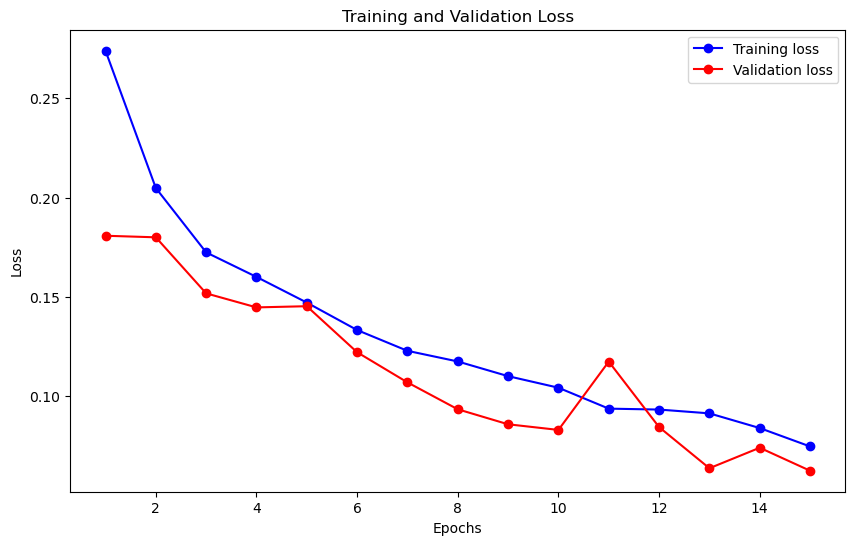

In [81]:
epochs = range(1, len(train_loss) + 1) #if early-stopping was trigerred, it wont be equal to number of epochs.

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [82]:
'''Now the test datatset is to be processed which only contains th ground truth unannotated image'''


'Now the test datatset is to be processed which only contains th ground truth unannotated image'

In [98]:
'''class to convert the test data to proper format'''
class SegmentationDataset_test(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.images = os.listdir(image_dir)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.images[idx])
        
        image = Image.open(image_path)
        
        if self.transform is not None:
            image = self.transform(image)
    
        
        return image

In [99]:
test_transform = transforms.Compose([
    transforms.Resize((image_height,image_width)),
    transforms.ToTensor(),
     transforms.Normalize((0.5,),(0.5,))
])
test_image_dir = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/test_set'
test_dataset = SegmentationDataset_test(test_image_dir, transform=test_transform)


In [100]:
print(len(test_dataset)) #__len__ function
print(test_dataset[0].shape)   #__getitem__ function for test _image

335
torch.Size([1, 572, 572])


In [101]:
print((test_dataset[0]).sum())

tensor(-195753.9219)


In [102]:
batch_size = 1
shuffle = False
pin_memory = True
test_loader = data_loader(test_dataset, batch_size, shuffle,pin_memory)
for images in test_loader:
    # images and masks are your batches of training data
    print(images.size())

torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 572, 572])
torch.Size([1,

In [103]:
def test(model, test_loader,test_file,folder, device=device):
    model.eval()  # Set the model to evaluation mode

    # Create the folder if it does not exist
    if not os.path.exists(folder):
        os.makedirs(folder)
        
    with torch.no_grad():
        with tqdm(test_loader, unit="batch") as tepoch:
            for idx, inputs_test in enumerate(tepoch):
                tepoch.set_description("Test prediction")

                # Move inputs to the device
                inputs_test = inputs_test.to(device)

                # Generate predictions
                y_out_test = model(inputs_test)

                # Threshold to get binary predictions
                outputs_test = (y_out_test > 0.5).float()

                # Save predictions for each batch
                torchvision.utils.save_image(outputs_test, os.path.join(folder, test_file[idx]))

    torch.cuda.empty_cache()  # Clear unused memory
    print("Finished Testing.")


In [104]:
test_file = os.listdir("/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/test_set")

In [105]:
test(model,test_loader,test_file,folder="/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/prediction_saved_test",device=device)

Test prediction: 100%|█████████████████████████████████████████████████████████████| 335/335 [00:12<00:00, 26.66batch/s]


Finished Testing.


Batch 0, Image Size: torch.Size([1, 1, 572, 572])


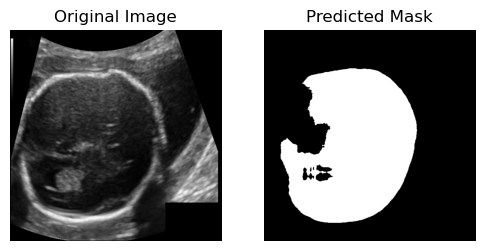

Batch 1, Image Size: torch.Size([1, 1, 572, 572])


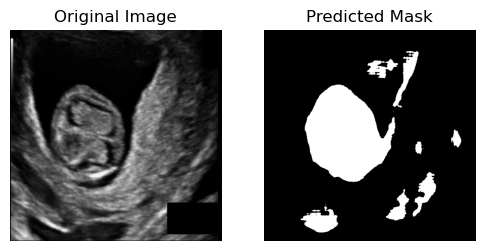

Batch 2, Image Size: torch.Size([1, 1, 572, 572])


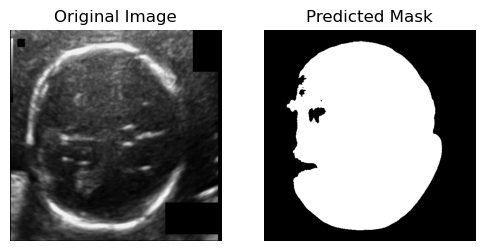

Batch 3, Image Size: torch.Size([1, 1, 572, 572])


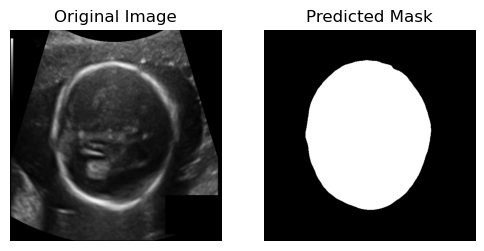

Batch 4, Image Size: torch.Size([1, 1, 572, 572])


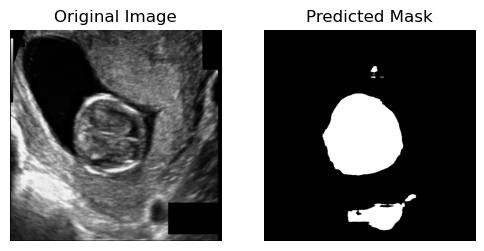

Batch 5, Image Size: torch.Size([1, 1, 572, 572])


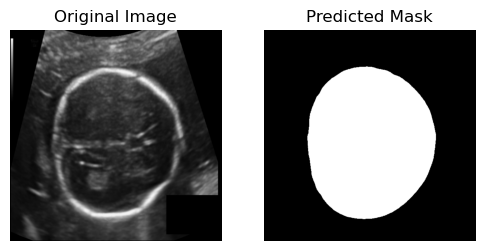

Batch 6, Image Size: torch.Size([1, 1, 572, 572])


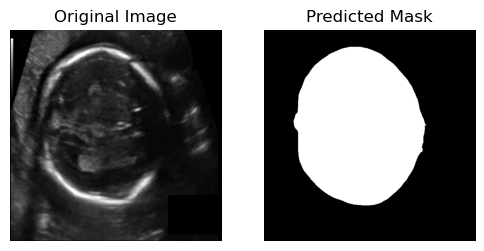

Batch 7, Image Size: torch.Size([1, 1, 572, 572])


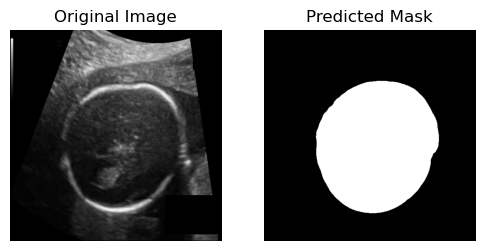

Batch 8, Image Size: torch.Size([1, 1, 572, 572])


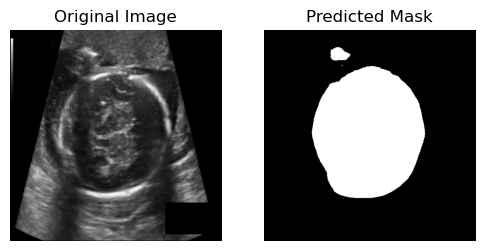

Batch 9, Image Size: torch.Size([1, 1, 572, 572])


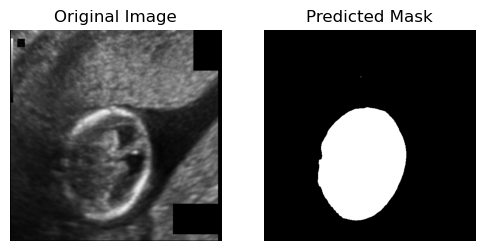

In [106]:
# Ensure the model is in evaluation mode and on the correct device
model = model.to('cuda')
model.eval()

count = 0  

for ith_batch, x_test in enumerate(test_loader):
    print(f"Batch {ith_batch}, Image Size: {x_test.size()}")

    # Move the input data to the same device as the model
    x_test = x_test.to('cuda')
    with torch.no_grad():
        y_test = model(x_test)
    y_test = (y_test > 0.5).float()

    # Plotting the image and its corresponding prediction
    fig = plt.figure(figsize=(6, 4))
    # Plotting the test image
    ax = fig.add_subplot(1, 2, 1)
    img = img_conv_x(x_test[0].cpu())  # Convert tensor to image format and move to CPU for visualization
    plt.imshow(img)
    ax.axis('off')
    ax.set_title('Original Image')

    # Plotting the prediction
    ax = fig.add_subplot(1, 2, 2)
    ann = img_conv_y(y_test[0].cpu())  # Convert tensor to image format and move to CPU for visualization and [0] for shape adjustment
    plt.imshow(ann)
    ax.axis('off')
    ax.set_title('Predicted Mask')

    plt.show()

    count += 1 
    if count >= 10:  # to plot 10 samples
        break



In [107]:
'''The original test image is resized to 572,572 here as it was the input to the unet model'''

root_folder = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/test_set'
save_folder = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/test_set_final'

# Create the save folder if it does not exist
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Image dimensions
image_height = 572
image_width = 572
transform = transforms.Compose([
    transforms.Resize((image_height, image_width)),
    transforms.ToTensor()])

for filename in os.listdir(root_folder):
    image_path = os.path.join(root_folder, filename)
    im = Image.open(image_path)
    im = transform(im)
    im = im.squeeze(0)  # If it has a channel dimension
    im = transforms.ToPILImage()(im)
    im.save(os.path.join(save_folder, filename))

In [108]:
'''here, the contouer is highlighted for the largest one only'''
def draw_contours_on_original(test_folder, prediction_folder, output_folder):
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for test_image_name in os.listdir(test_folder):
        test_image_path = os.path.join(test_folder, test_image_name)
        prediction_image_path = os.path.join(prediction_folder, test_image_name)
        test_image = cv2.imread(test_image_path)
        prediction = cv2.imread(prediction_image_path, 0)  #0 specifies that the image is loaded in grayscale mode
        
        # Find contours on the binary prediction
        contours, _ = cv2.findContours(prediction, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # Find the largest contour based on contour area
        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            # Draw the largest contour on the original test image
            cv2.drawContours(test_image, [largest_contour], -1, (0, 255, 0), 2)  # Green color is depicted by (0,255,0)-->R,G,B
            # 2 denotes the thickness of the drawn countour line; the -1 denoted that every contours in the given  list shpuld be drawn
        
        output_path = os.path.join(output_folder, test_image_name)
        cv2.imwrite(output_path, test_image)

In [109]:
test_folder = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/test_set_final'
prediction_folder = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/prediction_saved_test'
output_folder = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/final_test'
draw_contours_on_original(test_folder,prediction_folder,output_folder)

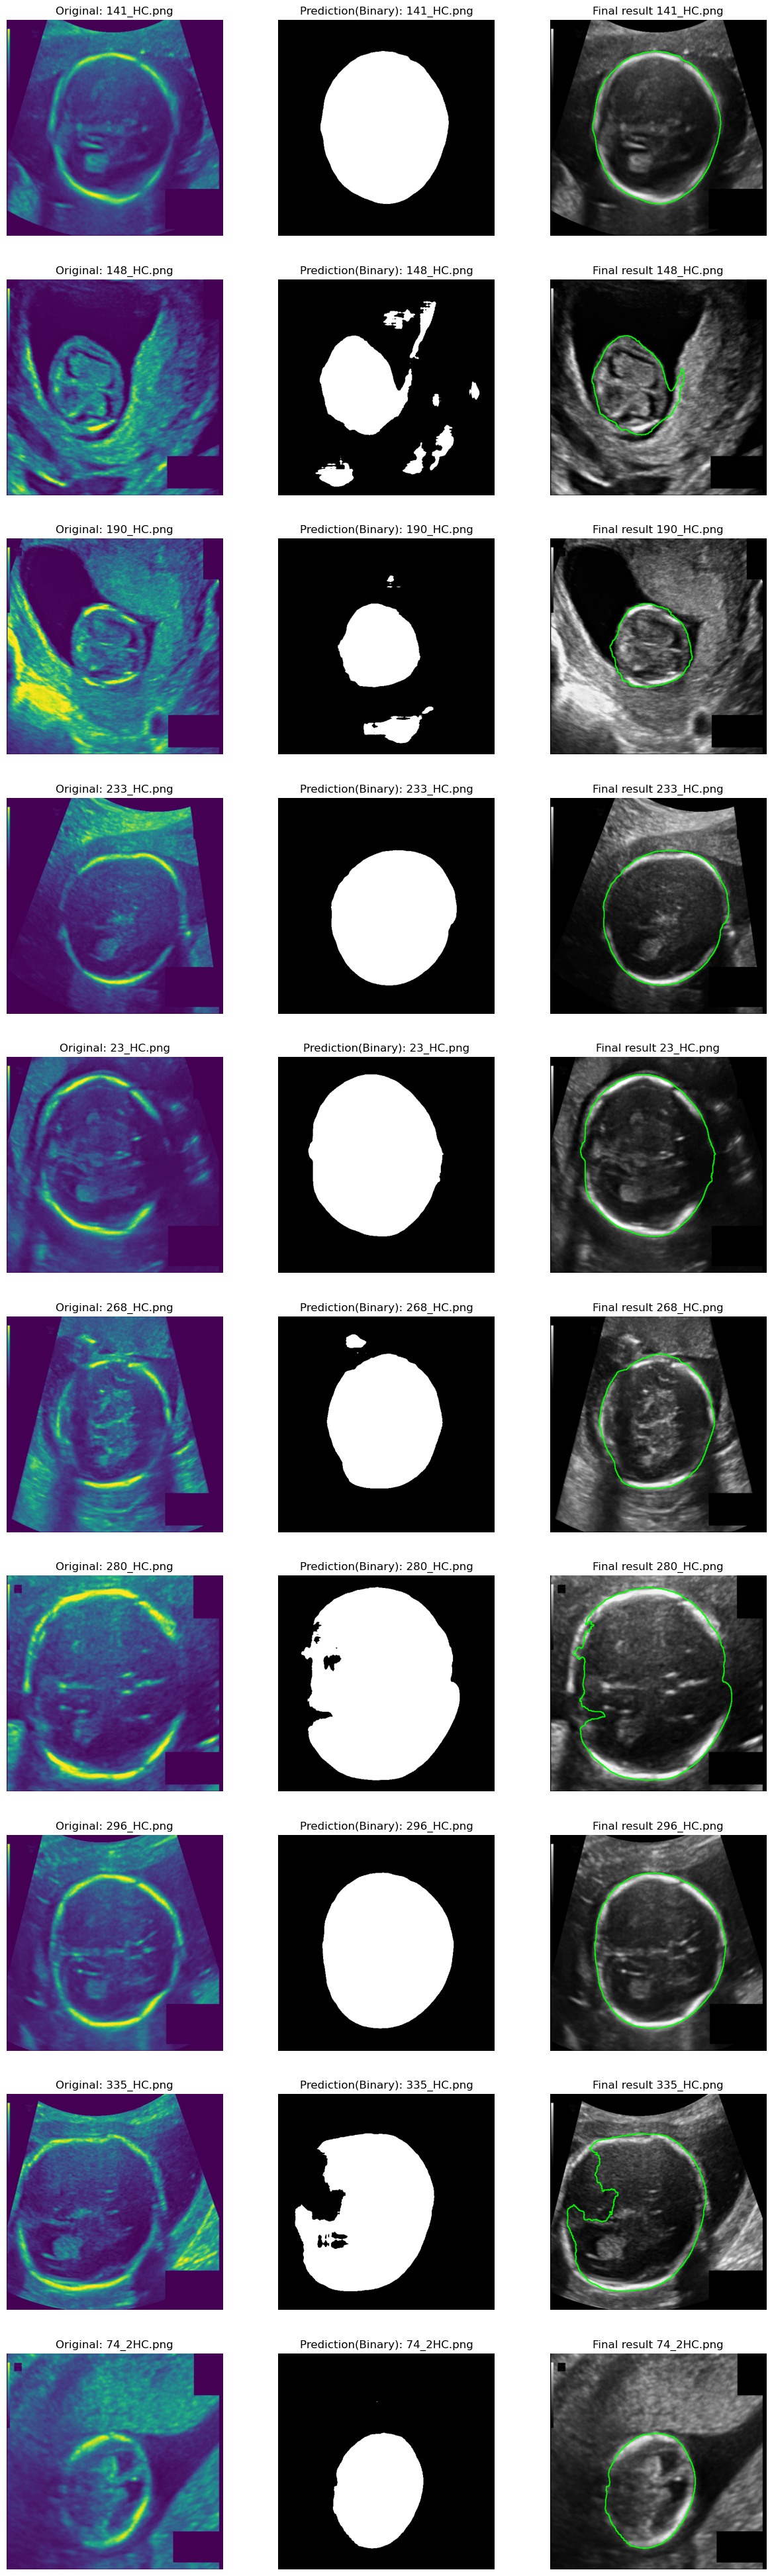

In [111]:
'''Displaying test results'''

folder1 = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/test_set_final'
folder2 = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/prediction_saved_test'
folder3 = '/media/user/data/ananthakrishnan/ananthakrishnan_architectures/u-net/final_test'
images1 = sorted(os.listdir(folder1)[:10])
images2 = sorted(os.listdir(folder2)[:10])
images3 = sorted(os.listdir(folder3)[:10])

num_images=10
# Create a figure with subplots
fig, axs = plt.subplots(num_images, 3, figsize=(15, num_images * 5))

# Display images
for i in range(num_images):
    img1 = Image.open(os.path.join(folder1, images1[i]))
    img2 = Image.open(os.path.join(folder2, images2[i]))
    img3 = Image.open(os.path.join(folder3, images3[i]))

    axs[i, 0].imshow(img1)
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f'Original: {images1[i]}')

    axs[i, 1].imshow(img2)
    axs[i, 1].axis('off')
    axs[i, 1].set_title(f'Prediction(Binary): {images2[i]}')

    axs[i, 2].imshow(img3)
    axs[i, 2].axis('off')
    axs[i, 2].set_title(f'Final result {images3[i]}')

plt.show()
